# Assignment 4: 


## Data Preprocessing                                                                       

                                                                                                     Sonu Dutta 
                                                                                                     RollNo: 4 
                                                                                                     TE (ENTC)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('country_wise_latest.csv')

In [3]:
#check first 5 entries
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263.0,1269.0,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,NaN,144.0,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973.0,1163.0,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,NaN,52.0,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950.0,41.0,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [4]:
df[:5]

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263.0,1269.0,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,NaN,144.0,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973.0,1163.0,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,NaN,52.0,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950.0,41.0,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [5]:
#no of rows and columns
df.shape

(187, 15)

In [6]:
# Delete unnecessary columns from dataset 
final = df.drop(['Deaths / 100 Cases','Recovered / 100 Cases','Deaths / 100 Recovered','1 week % increase','New recovered','Confirmed last week','1 week change','New cases','New deaths'],axis=1)


In [7]:
final

,Country/Region,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,36263.0,1269.0,25198,9796,Eastern Mediterranean
1,Albania,NaN,144.0,2745,1991,Europe
2,Algeria,27973.0,1163.0,18837,7973,Africa
3,Andorra,NaN,52.0,803,52,Europe
4,Angola,950.0,41.0,242,667,Africa
...,...,...,...,...,...,...
182,West Bank and Gaza,10621.0,NaN,3752,6791,Eastern Mediterranean
183,Western Sahara,10.0,1.0,8,1,Africa
184,Yemen,NaN,483.0,833,375,Eastern Mediterranean
185,Zambia,NaN,NaN,2815,1597,Africa


In [8]:
# handling of missing values
final.isna().sum()

Country/Region     0
Confirmed         24
Deaths            25
Recovered          0
Active             0
WHO Region         0
dtype: int64

In [9]:
# in Deaths and Recovered column we have 24/25 missing entries, let's try to fill it using average value
round(final.Confirmed.mean())

97293

In [10]:
final.Confirmed.fillna(round(final.Confirmed.mean()))

0      36263.0
1      97293.0
2      27973.0
3      97293.0
4        950.0
        ...   
182    10621.0
183       10.0
184    97293.0
185    97293.0
186     2704.0
Name: Confirmed, Length: 187, dtype: float64

In [11]:
round(final.Deaths.mean())

3638

In [12]:
final.Deaths.fillna(round(final.Confirmed.mean()))

0       1269.0
1        144.0
2       1163.0
3         52.0
4         41.0
        ...   
182    97293.0
183        1.0
184      483.0
185    97293.0
186       36.0
Name: Deaths, Length: 187, dtype: float64

In [13]:
# now replace above in the same column
final['Confirmed'] = final.Confirmed.fillna(round(final.Confirmed.mean()))

In [14]:
final['Deaths'] = final.Deaths.fillna(round(final.Deaths.mean()))

In [15]:
final.isna().sum()

Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [16]:
final.head(3)

,Country/Region,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,36263.0,1269.0,25198,9796,Eastern Mediterranean
1,Albania,97293.0,144.0,2745,1991,Europe
2,Algeria,27973.0,1163.0,18837,7973,Africa


In [17]:
# Feature selection:
# Change the sequence of the column:
final = final[['WHO Region','Country/Region', 'Active','Confirmed','Recovered','Deaths']]
final[:2]

,WHO Region,Country/Region,Active,Confirmed,Recovered,Deaths
0,Eastern Mediterranean,Afghanistan,9796,36263.0,25198,1269.0
1,Europe,Albania,1991,97293.0,2745,144.0


In [18]:
new=final.rename({'WHO Region':'WHORegion' , 'Country/Region': 'Country'},axis=1)
new

,WHORegion,Country,Active,Confirmed,Recovered,Deaths
0,Eastern Mediterranean,Afghanistan,9796,36263.0,25198,1269.0
1,Europe,Albania,1991,97293.0,2745,144.0
2,Africa,Algeria,7973,27973.0,18837,1163.0
3,Europe,Andorra,52,97293.0,803,52.0
4,Africa,Angola,667,950.0,242,41.0
...,...,...,...,...,...,...
182,Eastern Mediterranean,West Bank and Gaza,6791,10621.0,3752,3638.0
183,Africa,Western Sahara,1,10.0,8,1.0
184,Eastern Mediterranean,Yemen,375,97293.0,833,483.0
185,Africa,Zambia,1597,97293.0,2815,3638.0


In [19]:
# Preprocessing steps
# find out how manyunique category in WHORegion column
new.WHORegion.unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [20]:
#Checking for Europe in WHO region
new[new.WHORegion == 'Europe'].head(3)

,WHORegion,Country,Active,Confirmed,Recovered,Deaths
1,Europe,Albania,1991,97293.0,2745,144.0
3,Europe,Andorra,52,97293.0,803,52.0
7,Europe,Armenia,10014,37390.0,26665,711.0


In [21]:
new.WHORegion.value_counts()

Europe                   56
Africa                   48
Americas                 35
Eastern Mediterranean    22
Western Pacific          16
South-East Asia          10
Name: WHORegion, dtype: int64

In [22]:
#check data types of columns
new.dtypes

WHORegion     object
Country       object
Active         int64
Confirmed    float64
Recovered      int64
Deaths       float64
dtype: object

In [23]:
new.Confirmed.astype('int')
new.Deaths.astype('int')

0      1269
1       144
2      1163
3        52
4        41
       ... 
182    3638
183       1
184     483
185    3638
186      36
Name: Deaths, Length: 187, dtype: int32

In [24]:
#update above in final dataframe
new['Confirmed']= final.Confirmed.astype('int')
new['Deaths']= final.Deaths.astype('int')

In [25]:
new.dtypes

WHORegion    object
Country      object
Active        int64
Confirmed     int32
Recovered     int64
Deaths        int32
dtype: object

In [26]:
new.Deaths.max()

148011

<AxesSubplot:>

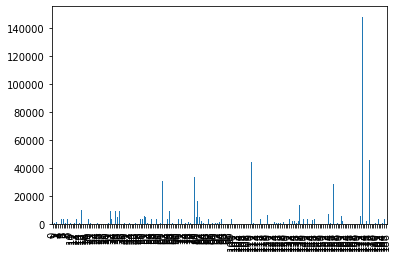

In [27]:
#bar
new['Deaths'].plot(kind='bar')

In [28]:
new[new.Deaths==148011]

,WHORegion,Country,Active,Confirmed,Recovered,Deaths
173,Americas,US,2816444,4290259,1325804,148011


In [29]:
new[new.Recovered==new.Recovered.max()]

,WHORegion,Country,Active,Confirmed,Recovered,Deaths
23,Americas,Brazil,508116,2442375,1846641,87618


In [30]:
#Conclusion:
# 1).The Maximum cases of deaths are found in US.
# 2).The Maximum cases of recovered patients are found in Brazil.
